In [2]:
import math
import matplotlib.pyplot as plt

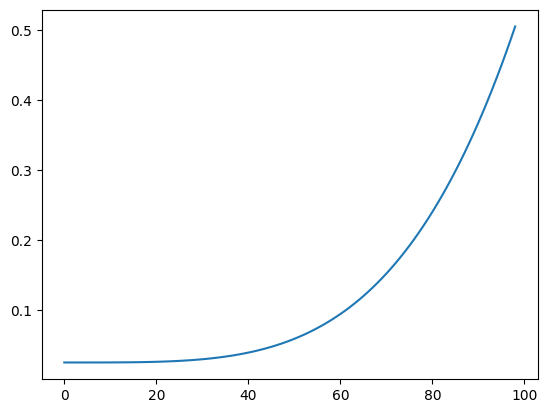

In [3]:
x = 1 / 40
max_generations = 100
values = []
for i in range(1, max_generations):
    values.append(x + ((i * 1/max_generations) ** 4) * 0.5)
plt.plot([x for x in values])

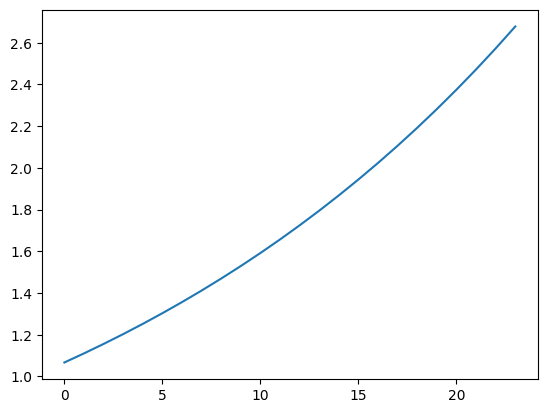

In [4]:
x = 1 / 40
max_generations = 25
values = []
for i in range(1, max_generations):
    values.append(math.exp(x + i * 1/max_generations))
plt.plot([x for x in values])

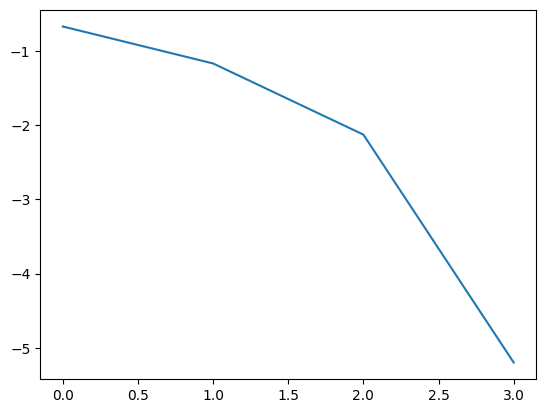

In [14]:
x = 1 / 40
max_generations = 5
values = []
for i in range(1, max_generations):
    values.append(1 / math.log(x + i * 1/max_generations))
plt.plot([x for x in values])

